In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [34]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Jawa Barat.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       346 non-null    float64       
 2   Tx       350 non-null    float64       
 3   Tavg     354 non-null    float64       
 4   RH_avg   353 non-null    float64       
 5   RR       246 non-null    float64       
 6   ss       361 non-null    float64       
 7   ff_x     362 non-null    float64       
 8   ddd_x    362 non-null    float64       
 9   ff_avg   362 non-null    float64       
 10  ddd_car  362 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-34-174bc8a9a5b0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [35]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,NaN,28.2,30.5,24.3
1,2023-02-01,20.7,29.3,25.0,24.4
2,2023-03-01,21.0,27.5,21.8,24.3
3,2023-04-01,21.5,29.3,10.6,25.4
4,2023-05-01,21.4,31.5,1.9,26.0
...,...,...,...,...,...
360,2023-12-16,23.0,33.6,NaN,28.2
361,2023-12-17,23.0,34.0,NaN,27.9
362,2023-12-18,23.1,34.3,NaN,28.0
363,2023-12-19,22.5,35.4,NaN,27.9


In [36]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [37]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [38]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [39]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,NaN,28.2,30.5,24.3
1,31,31,2023-01-02,22.6,NaN,5.6,25.2
2,59,60,2023-01-03,21.1,28.4,7.0,24.9
3,90,92,2023-01-04,23.8,28.8,NaN,26.1
4,120,123,2023-01-05,NaN,31.6,0.0,27.5
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.0,33.6,NaN,28.2
350,350,361,2023-12-17,23.0,34.0,NaN,27.9
351,351,362,2023-12-18,23.1,34.3,NaN,28.0
352,352,363,2023-12-19,22.5,35.4,NaN,27.9


In [40]:
#cek null
df1.isnull().sum()

level_0      0
index        0
Tanggal      0
Tn          18
Tx          14
RR         114
Tavg        11
dtype: int64

In [41]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       5
dtype: int64

In [42]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

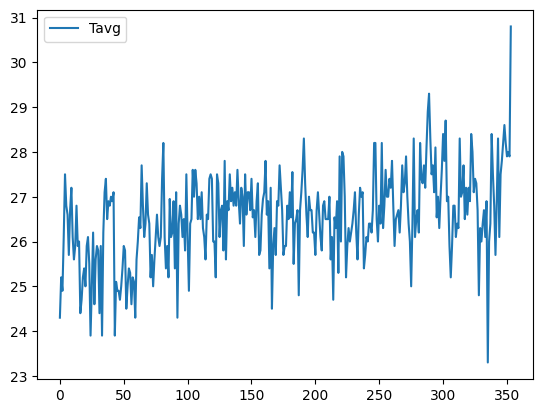

In [43]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

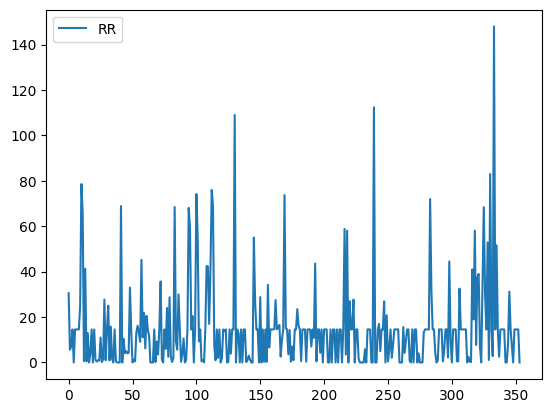

In [44]:
#plotting tavg
df1[['RR']].plot()

In [45]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 110 :
    print(row)

level_0                    239
index                      246
Tanggal    2023-08-28 00:00:00
Tn                        20.6
Tx                        32.0
RR                       112.4
Tavg                      25.7
Name: 239, dtype: object
level_0                    333
index                      343
Tanggal    2023-11-30 00:00:00
Tn                        22.8
Tx                        32.2
RR                       148.0
Tavg                      26.1
Name: 333, dtype: object


In [46]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 110 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

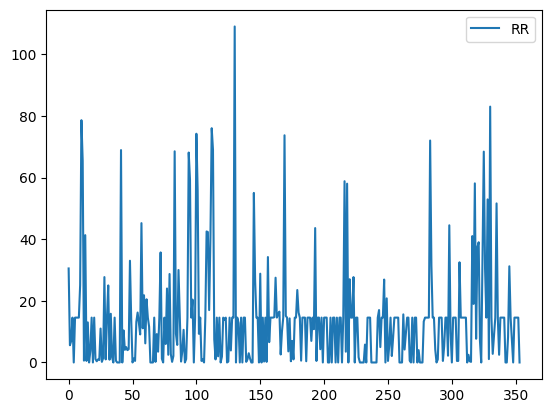

In [47]:
df1[['RR']].plot()

In [48]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.546131,28.200000,30.50000,24.3,32.486765,25.2,5.60000
1,31,31,2023-01-02,22.600000,32.486765,5.60000,25.2,28.400000,24.9,7.00000
2,59,60,2023-01-03,21.100000,28.400000,7.00000,24.9,28.800000,26.1,14.55375
3,90,92,2023-01-04,23.800000,28.800000,14.55375,26.1,31.600000,27.5,0.00000
4,120,123,2023-01-05,22.546131,31.600000,0.00000,27.5,33.400000,26.8,14.55375
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.000000,33.600000,14.55375,28.2,34.000000,27.9,14.55375
350,350,361,2023-12-17,23.000000,34.000000,14.55375,27.9,34.300000,28.0,14.55375
351,351,362,2023-12-18,23.100000,34.300000,14.55375,28.0,35.400000,27.9,14.55375
352,352,363,2023-12-19,22.500000,35.400000,14.55375,27.9,36.000000,30.8,0.00000


In [49]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,30.50000,24.3,25.2,5.60000
1,5.60000,25.2,24.9,7.00000
2,7.00000,24.9,26.1,14.55375
3,14.55375,26.1,27.5,0.00000
4,0.00000,27.5,26.8,14.55375
...,...,...,...,...
349,14.55375,28.2,27.9,14.55375
350,14.55375,27.9,28.0,14.55375
351,14.55375,28.0,27.9,14.55375
352,14.55375,27.9,30.8,0.00000


In [50]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,30.50000,24.3,25.2,5.60000
1,5.60000,25.2,24.9,7.00000
2,7.00000,24.9,26.1,14.55375
3,14.55375,26.1,27.5,0.00000
4,0.00000,27.5,26.8,14.55375
...,...,...,...,...
348,0.00000,28.6,28.2,14.55375
349,14.55375,28.2,27.9,14.55375
350,14.55375,27.9,28.0,14.55375
351,14.55375,28.0,27.9,14.55375


In [51]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,30.50000,24.3,25.2,5.60000,0
1,5.60000,25.2,24.9,7.00000,1
2,7.00000,24.9,26.1,14.55375,2
3,14.55375,26.1,27.5,0.00000,3
4,0.00000,27.5,26.8,14.55375,4
...,...,...,...,...,...
348,0.00000,28.6,28.2,14.55375,348
349,14.55375,28.2,27.9,14.55375,349
350,14.55375,27.9,28.0,14.55375,350
351,14.55375,28.0,27.9,14.55375,351


In [53]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [54]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [55]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
X_test

,Indeks,Tavg
282,282,28.2
283,283,27.4
284,284,27.3
285,285,27.7
286,286,27.2
...,...,...
348,348,28.6
349,349,28.2
350,350,27.9
351,351,28.0


In [57]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.32887157, 27.08913756, 27.06158207, 27.18558266, 27.0367823 ,
       27.31233898, 27.55758445, 27.68158504, 27.38122859, 27.14149458,
       27.20487274, 27.02576116, 27.33162906, 26.86126055, 27.00371712,
       26.79429432, 27.00922857, 27.1938516 , 27.43909707, 27.25998549,
       27.53554217, 26.99269598, 27.02576292, 26.69509526, 26.48567246,
       26.70060671, 26.97616339, 26.97891912, 26.76949632, 26.8631857 ,
       26.83563021, 27.44461028, 27.05332018, 27.08638712, 27.27101015,
       26.91003127, 27.12496552, 26.94585394, 27.13047697, 27.04229904,
       27.49972303, 27.38123389, 27.11118865, 27.20487803, 27.17732254,
       26.99821096, 26.42505355, 26.88247754, 26.79429962, 26.91830021,
       27.01198959, 26.83287801, 27.07812348, 25.98967537, 26.81083397,
       26.93483456, 27.54381464, 27.27376941, 27.06434661, 26.73367894,
       27.10016928, 27.52728205, 26.86319099, 27.29030376, 27.38399314,
       27.50799374, 27.63199433, 27.51350519, 27.42532726, 27.45

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.7091550318937511 0.9821535882420198


In [59]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,28.2
283,283,27.4
284,284,27.3
285,285,27.7
286,286,27.2
...,...,...
348,348,28.6
349,349,28.2
350,350,27.9
351,351,28.0


In [60]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.328872
283,27.089138
284,27.061582
285,27.185583
286,27.036782
...,...
348,27.631994
349,27.513505
350,27.425327


In [61]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-61-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,24.3,NaN
1,25.2,NaN
2,24.9,NaN
3,26.1,NaN
4,27.5,NaN
...,...,...
348,28.6,27.631994
349,28.2,27.513505
350,27.9,27.425327
351,28.0,27.458394


<Axes: >

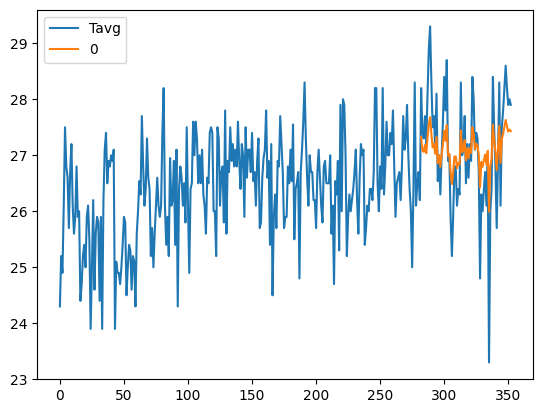

In [62]:
kan.plot()

In [63]:
new_data = [[354,27.9],[355,27.9],[356,27.9],[357,27.9],[358,27.9],[359,27.9],[360,27.9]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.43635016, 27.43910589, 27.44186161, 27.44461734, 27.44737307,
       27.45012879, 27.45288452])

In [64]:
kan.to_json('Prediksi Jawa Barat.json')